In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!ls

Data  Data Exploration.ipynb  README.md


In [11]:
import csv
fi=open('Data/redditSubmissions.csv')
r=csv.reader(fi)


In [12]:
data=list(r)

In [13]:
len(data)

132309

In [14]:
data.pop(0)

['#image_id',
 'unixtime',
 'rawtime',
 'title',
 'total_votes',
 'reddit_id',
 'number_of_upvotes',
 'subreddit',
 'number_of_downvotes',
 'localtime',
 'score',
 'number_of_comments',
 'username']

In [15]:
data[0:3]

[['0',
  '1333172439',
  '2012-03-31T12:40:39.590113-07:00',
  "And here's a downvote.",
  '63470',
  'rmqjs',
  '32657',
  'funny',
  '30813',
  '1333197639',
  '1844',
  '622',
  'Animates_Everything'],
 ['0',
  '1333178161',
  '2012-03-31T14:16:01.093638-07:00',
  'Expectation',
  '35',
  'rmun4',
  '29',
  'GifSound',
  '6',
  '1333203361',
  '23',
  '3',
  'Gangsta_Raper'],
 ['0',
  '1333199913',
  '2012-03-31T20:18:33.192906-07:00',
  'Downvote',
  '41',
  'rna86',
  '32',
  'GifSound',
  '9',
  '1333225113',
  '23',
  '0',
  'Gangsta_Raper']]

In [27]:
images=[x[0] for x in data]
len(set(images))

16736

In [28]:
print data[0]

['0', '1333172439', '2012-03-31T12:40:39.590113-07:00', "And here's a downvote.", '63470', 'rmqjs', '32657', 'funny', '30813', '1333197639', '1844', '622', 'Animates_Everything']


Unique number of images analysed=16736

In [29]:
import matplotlib.pyplot as plt

In [30]:
data.pop(53033)

['20089', '']

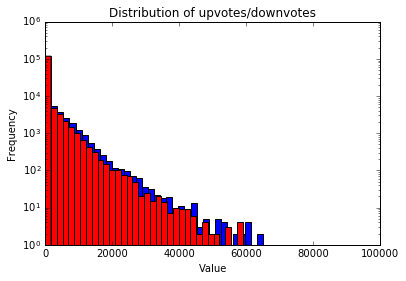

In [31]:
upvotes=[int(x[6]) for x in data]
downvotes=[int(x[8]) for x in data]
plt.hist(upvotes,log=True,bins=50,color='b')
plt.hist(downvotes,log=True,bins=50,color='r')
plt.title("Distribution of upvotes/downvotes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [32]:
for i in range(len(data)):
    if int(data[i][6])>80000:
        print data[i]

['2713', '1349205792', '2012-10-02T19:23:12+00:00', 'Airline screwed up, a friend just posted this on Facebook.', '177103', '10tya8', '90396', 'funny', '86707', '1349205792', '3689', '3488', 'lepry']


In [33]:
for i in range(len(data)):
    if int(data[i][8])>80000:
        print data[i]

['2713', '1349205792', '2012-10-02T19:23:12+00:00', 'Airline screwed up, a friend just posted this on Facebook.', '177103', '10tya8', '90396', 'funny', '86707', '1349205792', '3689', '3488', 'lepry']


In [34]:
score=[upvotes[i]-downvotes[i] for i in xrange(len(upvotes))]

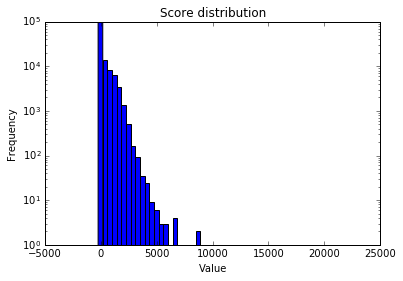

In [35]:
plt.hist(score,log=True,bins=50)
plt.title("Score distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [36]:
for i in range(len(popular)):
    if score[i]>10000:
        print data[i]

NameError: name 'popular' is not defined

In [37]:
for i in range(len(popular)):
    if score[i]<-100:
        print data[i]

NameError: name 'popular' is not defined

In [38]:
d={}
for x in data:
    if x[0] in d:
        d[x[0]]+=1
    else:
        d[x[0]]=1

In [39]:
import operator
max(d.iteritems(), key=operator.itemgetter(1))[0]

'6037'

In [40]:
d['6037']

166

In [41]:
resub=[]
for k in d.keys():
    resub.append(d[k])

Image resubmitted maximum times=6037,166 times

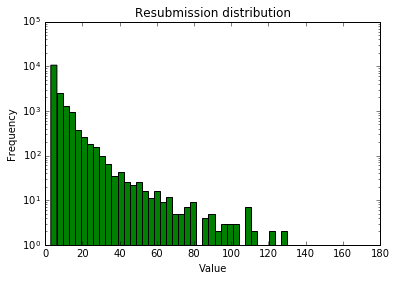

In [42]:
plt.hist(resub,log=True,bins=50,color='g')
plt.title("Resubmission distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [43]:
users=[x[12] for x in data]
len(set(users))

63338

No. of unique users=63338

In [44]:
u={}
for x in data:
    if x[12] in u:
        u[x[12]]+=1
    else:
        u[x[12]]=1

In [45]:
max(u.iteritems(), key=operator.itemgetter(1))[0]

''

In [46]:
u['']

20259

In [47]:
del u['']

In [48]:
max(u.iteritems(), key=operator.itemgetter(1))[0]

'Gangsta_Raper'

In [49]:
u['Gangsta_Raper']

5608

'Gangsta_Raper' posted 5608 times

In [50]:
user_posts=[]
for k in u.keys():
    user_posts.append(u[k])

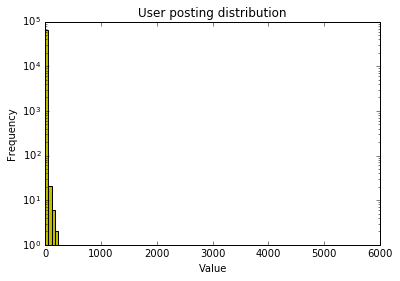

In [51]:
plt.hist(user_posts,log=True,bins=100,color='y')
plt.title("User posting distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

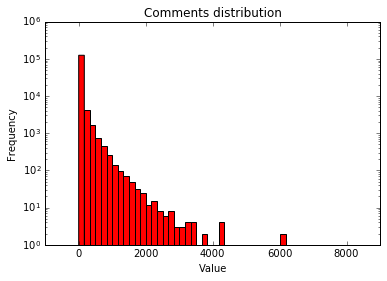

In [53]:
comments=[int(x[11]) for x in data]
plt.hist(comments,log=True,bins=50,color='r')
plt.title("Comments distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [54]:
for i in range(len(popular)):
    if comments[i]>8000:
        print data[i]

NameError: name 'popular' is not defined

#feature analysis#

In [97]:
import hashlib

In [100]:
a="funny"
b="top"
c="science"
print hash(a)
print hash(b)

1499544145693939105
-1495230934637649110


In [162]:
def feature(datum):
    feat=[]
    feat.append(long(datum[0]))
    feat.append(long(datum[1]))
    feat.append(len(datum[3]))
    feat.append(hash(datum[3]))
    #feat.append(datum[5])
    feat.append(hash(datum[7]))
    #feat.append(datum[9])
    feat.append(len(datum[12]))
    feat.append(1)
    return feat

In [163]:
dataY=score
dataX=[feature(d) for d in data]

In [164]:
import math
trainX=dataX[0:int(len(dataX)*0.8)]
validX=dataX[int(len(dataX)*0.8)+1:int(len(dataX)*0.9)]
testX=dataX[int(len(dataX)*0.9)+1:len(dataX)]

trainY=dataY[0:int(len(dataY)*0.8)]
validY=dataY[int(len(dataY)*0.8)+1:int(len(dataY)*0.9)]
testY=dataY[int(len(dataY)*0.9)+1:len(dataY)]



In [165]:
print len(dataX)
print len(dataY)
print len(test)
print len(train)

132307
132307
13230
105845


In [166]:
dataX[0]

[0L, 1333172439L, 22, -535039097019551388, 1499544145693939105, 19, 1]

#Simple linear regression for initial testing#

In [167]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [168]:
regr.score(testX,testY)

0.012028027776617489

#PCA#

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(trainX)
trainX_pca=pca.transform(trainX)
testX_pca=pca.transform(testX)

In [170]:
print(pca.explained_variance_ratio_) 

[  7.35417500e-01   2.64582500e-01   4.31660821e-24]


In [171]:
regr.fit(trainX_pca, trainY)
regr.score(testX_pca,testY)

0.0091022957166806417

In [172]:
pca.components_

array([[  1.04652370e-17,  -1.03805853e-14,   1.08603766e-16,
          9.99989763e-01,   4.52483476e-03,   1.26343681e-21,
          0.00000000e+00],
       [ -9.20709512e-17,   4.98046049e-13,   6.31662939e-17,
          4.52483476e-03,  -9.99989763e-01,   7.27223262e-20,
          0.00000000e+00],
       [  5.63544102e-05,  -9.99999998e-01,  -3.39886591e-05,
         -8.16013923e-15,  -4.98379116e-13,   5.20091369e-09,
          0.00000000e+00]])

In [ ]:
def feature(datum):
    feat=[]
    feat.append(long(datum[0]))
    feat.append(long(datum[1]))
    feat.append(len(datum[3]))
    feat.append(hash(datum[3]))
    #feat.append(datum[5])
    feat.append(hash(datum[7]))
    #feat.append(datum[9])
    feat.append(len(datum[12]))
    feat.append(1)
    return feat